In [12]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from tqdm import tqdm
from pycaret.classification import *
from zipfile import ZipFile
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
trn_y_path = "../downloads/train_y_v0.1.0.csv"
trn_x_path = "../downloads/train_X_v0.1.0.zip"
tst_x_path = "../downloads/test_X_v0.1.0.zip"

In [39]:
zipf = ZipFile(trn_x_path, 'r')

In [30]:
# zipftest = ZipFile(tst_x_path, 'r')

In [ ]:
# listtestfile = zipftest.namelist()[1:]

In [40]:
train_y = pd.read_csv(trn_y_path)

In [41]:
train_y.filename[1130]

'train_X1130.pkl'

In [35]:
# listtestfile[178350]

'test_X/test_X297620.pkl'

In [37]:
# len(pickle.loads(zipftest.read("test_X/test_X304021.pkl"))['v'])

439

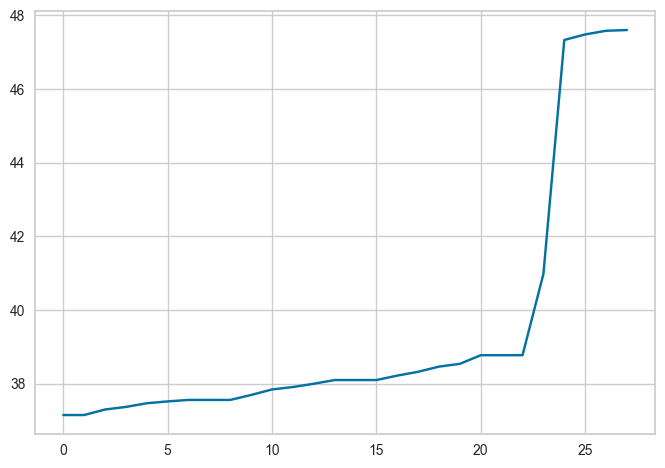

In [59]:
t = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['t'].astype('timedelta64[s]').astype(int)
v = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['v']
# plt.plot(v)
# plt.show()

In [64]:
import numpy as np
import tsfel
import json
from scipy.interpolate import interp1d

In [65]:
with open("../data_prep/tsfel_freq_config.json", "r") as f:
    tsfel_freq_cfg = json.load(f)

In [94]:
# interpolate values
dt = 4838397.067/85922
ts1 = np.linspace(t.min(), t.max(), num=len(v))
ts2 = np.arange(t.min(), t.max(), dt)

interpolator = interp1d(t, v, kind='nearest')
values_fixed = interpolator(ts1)
values_forfreq = interpolator(ts2)

# statistical and temporal domain
cfg1 = tsfel.get_features_by_domain(domain=['statistical', 'temporal'])
features_df_1 = tsfel.time_series_features_extractor(
    cfg1, v,
    fs=1/((ts1[1]-ts1[0])/3600),
    verbose=False
)

# frequency domain
cfg2 = tsfel_freq_cfg
features_df_2 = tsfel.time_series_features_extractor(
    cfg2, values_fixed,
    fs=1/((ts1[1]-ts1[0])/3600),
    verbose=False
)

ValueError: cannot reindex on an axis with duplicate labels

In [85]:
1/((ts1[1]-ts1[0])/3600)

0.04173106646058732

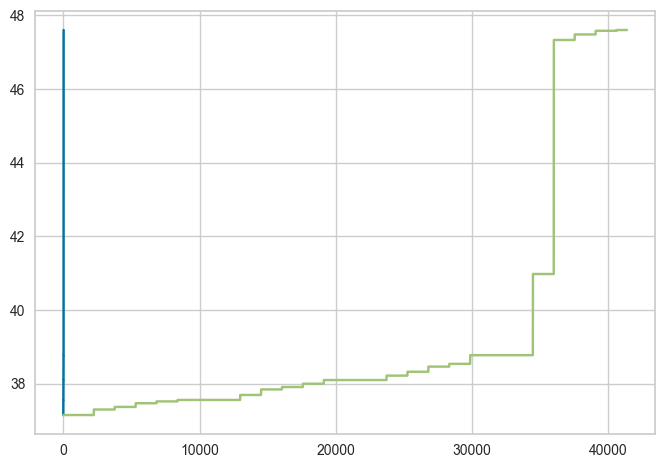

In [82]:
plt.plot(values_fixed)
plt.plot(values_forfreq)

In [78]:
features_df_2

,0_Fundamental frequency,0_Human range energy,0_Max power spectrum,0_Maximum frequency,0_Median frequency,0_Power bandwidth,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,...,0_Wavelet standard deviation_7.99Hz,0_Wavelet variance_1.78Hz,0_Wavelet variance_15.98Hz,0_Wavelet variance_2.0Hz,0_Wavelet variance_2.28Hz,0_Wavelet variance_2.66Hz,0_Wavelet variance_3.2Hz,0_Wavelet variance_4.0Hz,0_Wavelet variance_5.33Hz,0_Wavelet variance_7.99Hz
0,2.283218,0.996316,0.04488,11.416089,0.0,9.132871,1.50654,-18.68109,-8830.609954,0.62846,...,12.702539,698.13292,40.862081,396.128646,222.071115,205.66299,278.067543,309.130113,262.863831,161.354495


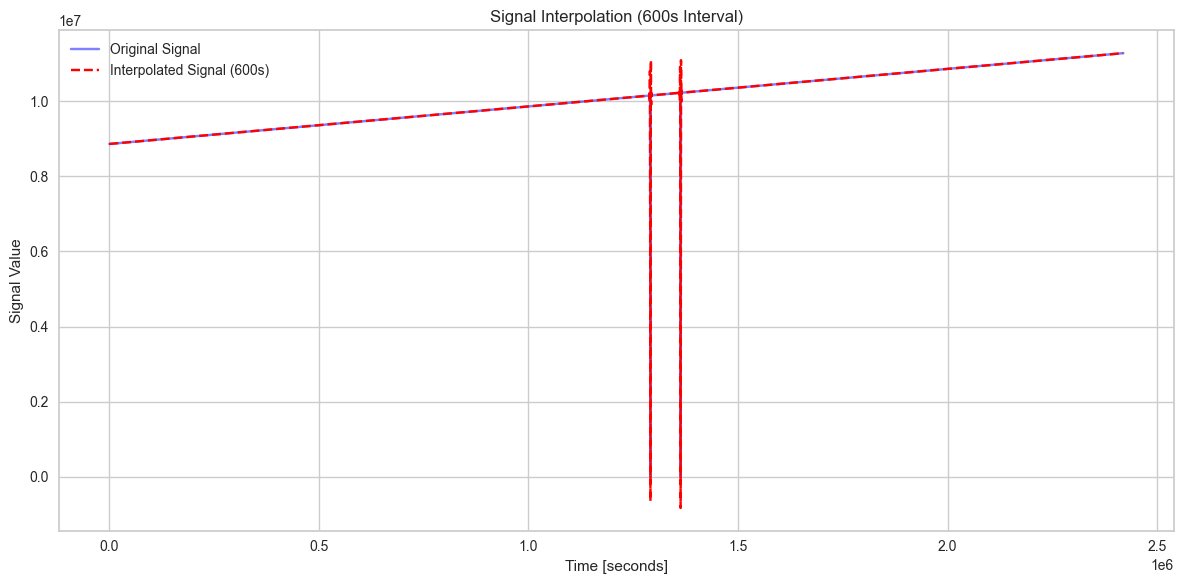

In [210]:
import pickle
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal

# Load the file
file_index = 17
file_name = train_y.filename[file_index]  # Adjust based on your train_y structure
data = pickle.loads(zipf.read('train_X/' + file_name))

# Extract time (t) and signal (x)
t = data['t'].astype('timedelta64[s]').astype(int)  # Time in seconds
x = data['v']  # Signal values

# Define the new time grid (600 seconds interval)
start_time = t.min()
end_time = t.max()

# Create a time vector with 600-second intervals
new_t = np.arange(start_time, end_time + 1, 300)  # 600s interval

# Interpolate the signal to the new time grid
interpolation_function = interp1d(t, x, kind='cubic', fill_value="extrapolate")
new_x = interpolation_function(new_t)

# Plot original and interpolated signals
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Original Signal', color='blue', alpha=0.5)
plt.plot(new_t, new_x, label='Interpolated Signal (600s)', color='red', linestyle='dashed')

plt.xlabel('Time [seconds]')
plt.ylabel('Signal Value')
plt.title('Signal Interpolation (600s Interval)')
plt.legend()
plt.tight_layout()
plt.show()


In [205]:
x = new_x
t = new_t

In [206]:
# Compute the sampling interval (average time difference between samples)
dt = np.mean(np.diff(t))  # Time difference in seconds

# Compute the sampling frequency
fs = 1.0 / dt  # Sampling frequency in Hz

print(f"Sampling Rate: {fs} Hz")

Sampling Rate: 0.0033333333333333335 Hz


In [207]:
# Define spectrogram parameters
nperseg = 256     # Length of each segment
noverlap = 128    # Number of points to overlap between segments
nfft = 512        # Number of FFT points

# Compute the spectrogram
frequencies, times, Sxx = signal.spectrogram(
    x,
    fs=fs,
    window='hann',
    scaling='density',
    mode='magnitude'
)

In [208]:
Sxx.shape

(129, 17)

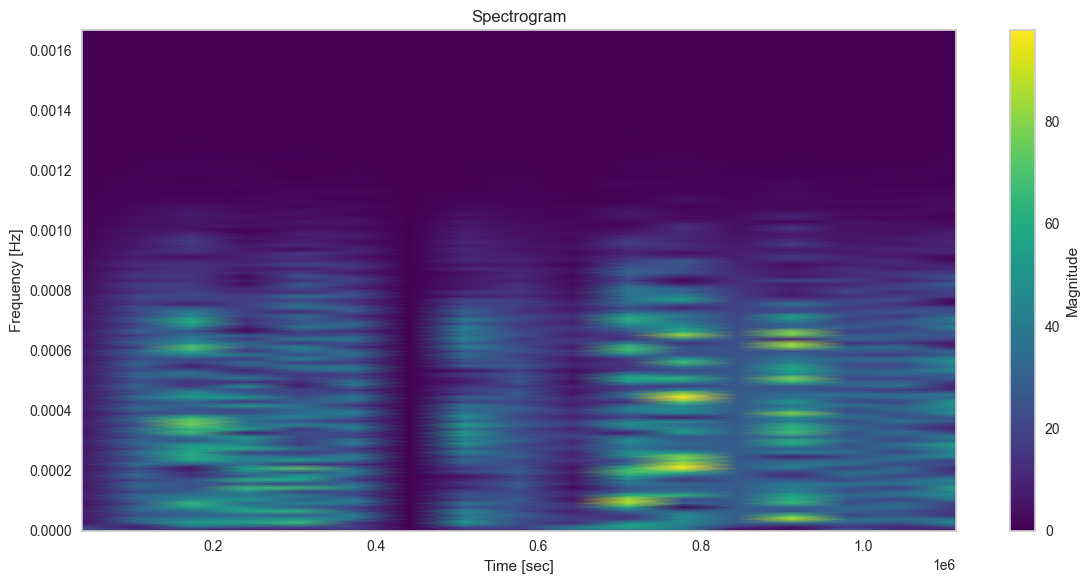

In [209]:
plt.figure(figsize=(12, 6))

# Plot using pcolormesh for better performance with large datasets
plt.pcolormesh(times, frequencies, Sxx, shading='gouraud', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()


In [147]:
# Compute the Discrete Fourier Transform of the signal
X = np.fft.fft(x)

# Compute the frequency bins
freqs = np.fft.fftfreq(len(x), d=1/fs)

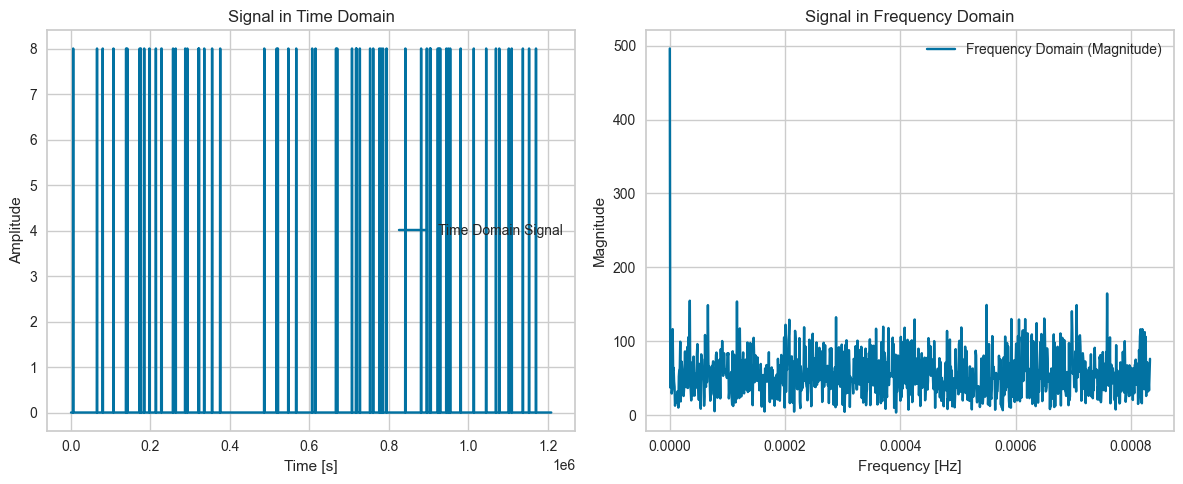

In [148]:
# Calculate the magnitude of the FFT
X_magnitude = np.abs(X)

# Only keep the positive half of frequencies and magnitudes
# (for real signals, the FFT is symmetric about zero frequency)
half_n = len(x) // 2
freqs_pos = freqs[:half_n]
X_magnitude_pos = X_magnitude[:half_n]

# Plot time-domain signal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, x, label='Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal in Time Domain')
plt.legend()
plt.grid(True)

# Plot frequency-domain signal
plt.subplot(1, 2, 2)
plt.plot(freqs_pos, X_magnitude_pos, label='Frequency Domain (Magnitude)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Signal in Frequency Domain')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [140]:
len(freqs_pos)

1009